## Customer Churn Prediction

In [261]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_excel("Prediction Data.xlsx")

In [263]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11310-RAJ,Female,78,Yes,Rajasthan,0,15,Deal 2,Yes,Yes,...,Bank Withdrawal,102.150002,4735.350098,0.0,0,1535.400024,6270.750000,Stayed,Others,Others
1,11340-JAM,Female,21,No,Jammu & Kashmir,8,7,NaN,Yes,No,...,Bank Withdrawal,19.950001,219.500000,0.0,0,78.599998,298.100006,Stayed,Others,Others
2,11348-MAH,Female,46,No,Maharashtra,11,19,Deal 3,Yes,No,...,Bank Withdrawal,56.049999,1522.650024,0.0,110,1235.079956,2867.729980,Stayed,Others,Others
3,11359-AND,Female,28,Yes,Andhra Pradesh,3,6,Deal 4,Yes,No,...,Credit Card,20.500000,290.549988,0.0,0,435.839996,726.390015,Stayed,Others,Others
4,11370-TAM,Female,21,No,Tamil Nadu,15,10,Deal 4,Yes,No,...,Credit Card,59.099998,772.849976,0.0,0,476.140015,1248.989990,Stayed,Others,Others


In [264]:
# Data Processing
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [265]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [266]:
columns_to_encode = [
    'Gender', 'Age', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
    'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
    'Paperless_Billing', 'Payment_Method'
]

In [267]:
label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])

In [268]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0, 'Churned':1})

In [269]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,60,1,16,0,15,1,1,1,1,...,1,1,0,102.150002,4735.350098,0.0,0,1535.400024,6270.750000,0
1,0,3,0,7,8,7,5,1,0,0,...,1,1,0,19.950001,219.500000,0.0,0,78.599998,298.100006,0
2,0,28,0,12,11,19,2,1,0,1,...,0,0,0,56.049999,1522.650024,0.0,110,1235.079956,2867.729980,0
3,0,10,1,0,3,6,3,1,0,0,...,2,0,1,20.500000,290.549988,0.0,0,435.839996,726.390015,0
4,0,3,0,17,15,10,3,1,0,1,...,1,0,1,59.099998,772.849976,0.0,0,476.140015,1248.989990,0


In [270]:
# Spliting the data in features and targets
X = df.drop('Customer_Status', axis=1)
Y = df['Customer_Status']

In [271]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [272]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


X_train shape: (4805, 28)
Y_train shape: (4805,)


In [273]:
X

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,60,1,16,0,15,1,1,1,1,...,1,1,1,0,102.150002,4735.350098,0.0,0,1535.400024,6270.750000
1,0,3,0,7,8,7,5,1,0,0,...,0,1,1,0,19.950001,219.500000,0.0,0,78.599998,298.100006
2,0,28,0,12,11,19,2,1,0,1,...,0,0,0,0,56.049999,1522.650024,0.0,110,1235.079956,2867.729980
3,0,10,1,0,3,6,3,1,0,0,...,0,2,0,1,20.500000,290.549988,0.0,0,435.839996,726.390015
4,0,3,0,17,15,10,3,1,0,1,...,1,1,0,1,59.099998,772.849976,0.0,0,476.140015,1248.989990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,27,0,7,4,17,3,1,0,0,...,0,0,1,0,21.150000,306.049988,0.0,0,406.799988,712.849976
6003,1,16,0,19,2,2,5,0,0,1,...,1,0,1,0,44.650002,1156.550049,0.0,0,0.000000,1156.550049
6004,1,54,1,21,1,36,2,1,1,1,...,1,1,1,0,110.849998,3204.399902,0.0,0,1278.760010,4483.160156
6005,0,59,0,11,5,22,5,1,0,1,...,1,2,1,0,88.449997,2130.550049,0.0,0,46.689999,2177.239990


In [274]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6002    0
6003    0
6004    0
6005    0
6006    1
Name: Customer_Status, Length: 6007, dtype: int64

In [275]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [276]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [277]:
y_pred = model.predict(X_test)

In [278]:
np.mean(y_pred == Y_test)

np.float64(0.8544093178036606)

In [279]:
# Evaluate
print("Confusion Matrix")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Confusion Matrix
[[825  48]
 [127 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       873
           1       0.81      0.61      0.70       329

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.85      0.85      0.85      1202



In [280]:
# Feature Selection using Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

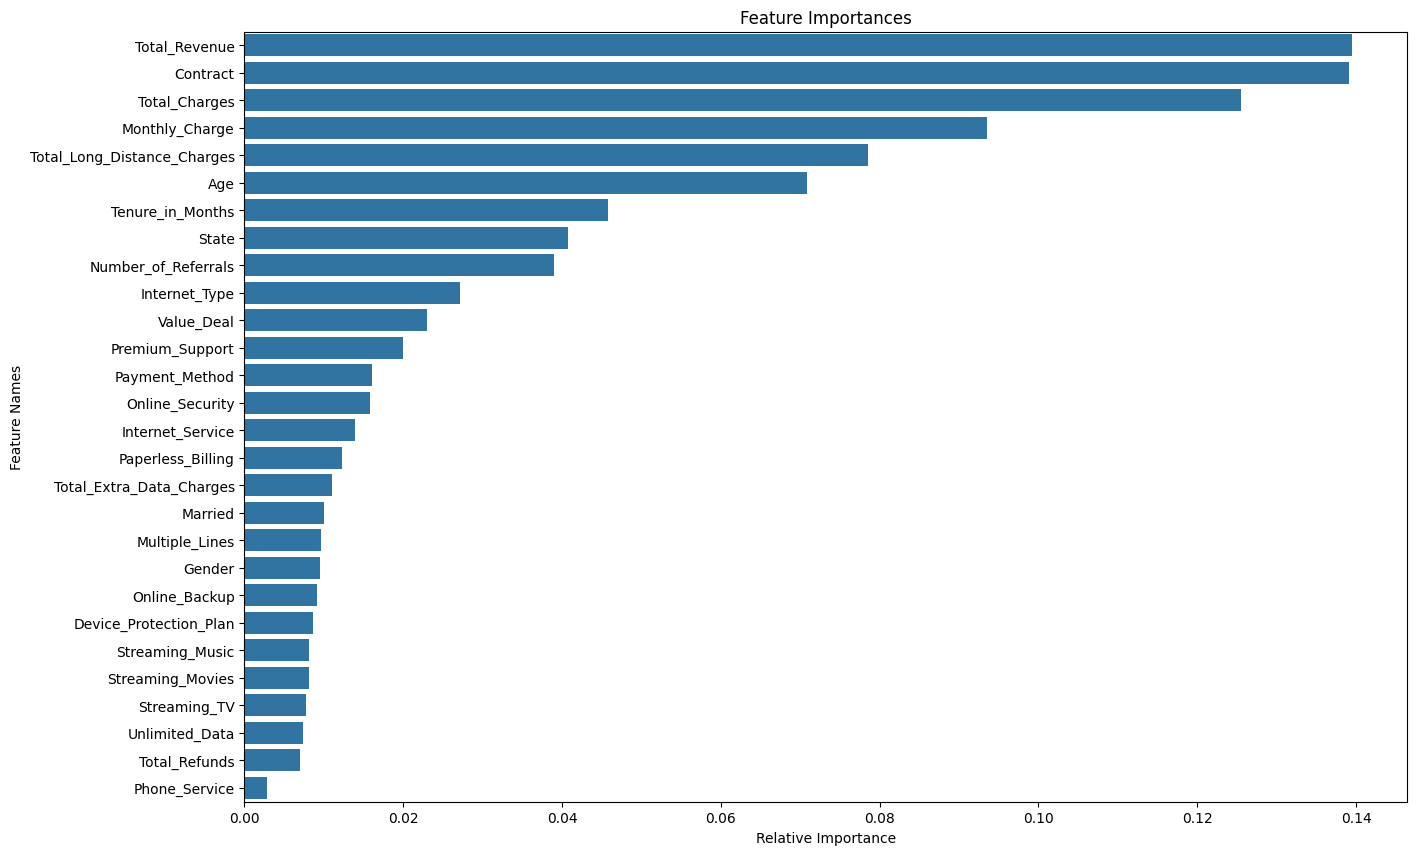

In [281]:
# Plot the feature importances
plt.figure(figsize=(15,10))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [282]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\New folder\Python\New folder\Prediction Data.xlsx"

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame

df_n = pd.read_excel(file_path, sheet_name=sheet_name)

In [283]:
df_n

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.00,0,42.189999,104.989998,Joined,Others,Others
1,12469-AND,Male,24,Yes,Andhra Pradesh,11,4,NaN,Yes,No,...,Credit Card,55.299999,55.299999,0.00,0,36.689999,91.989998,Joined,Others,Others
2,12490-TEL,Female,52,No,Telangana,9,6,NaN,Yes,No,...,Mailed Check,74.750000,238.100006,38.84,0,37.500000,236.759995,Joined,Others,Others
3,16032-AND,Female,47,No,Andhra Pradesh,8,18,NaN,Yes,No,...,Bank Withdrawal,46.599998,87.900002,0.00,0,3.740000,91.639999,Joined,Others,Others
4,16068-BIH,Female,44,Yes,Bihar,4,25,Deal 5,No,No,...,Bank Withdrawal,25.250000,25.250000,0.00,10,0.000000,35.250000,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,97497-RAJ,Male,24,Yes,Rajasthan,9,8,Deal 5,Yes,No,...,Bank Withdrawal,49.900002,49.900002,0.00,0,6.350000,56.250000,Joined,Others,Others
407,97615-MAH,Female,23,Yes,Maharashtra,11,10,Deal 5,Yes,No,...,Credit Card,20.200001,20.200001,0.00,0,41.099998,61.299999,Joined,Others,Others
408,97828-MAH,Female,57,No,Maharashtra,0,12,Deal 5,Yes,No,...,Bank Withdrawal,92.000000,266.799988,0.00,0,46.799999,313.600006,Joined,Others,Others
409,98767-WES,Female,26,No,West Bengal,14,7,NaN,Yes,No,...,Credit Card,20.049999,20.049999,0.00,0,11.100000,31.150000,Joined,Others,Others


In [284]:
df0=df_n.copy()

In [285]:
customer_ids = df_n['Customer_ID']

In [286]:
df_n = df_n.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Customer_Status'], axis=1)

In [287]:
for column in df_n.select_dtypes(include=['object']).columns:
    df_n[column] = label_encoder[column].transform(df_n[column])

In [288]:
df_n

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,51,1,4,0,10,5,1,0,1,...,1,0,1,1,62.799999,62.799999,0.00,0,42.189999,104.989998
1,1,24,1,0,11,4,5,1,0,1,...,1,0,1,1,55.299999,55.299999,0.00,0,36.689999,91.989998
2,0,52,0,18,9,6,5,1,0,1,...,1,0,1,2,74.750000,238.100006,38.84,0,37.500000,236.759995
3,0,47,0,0,8,18,5,1,0,1,...,1,0,1,0,46.599998,87.900002,0.00,0,3.740000,91.639999
4,0,44,1,2,4,25,4,0,0,1,...,0,0,0,0,25.250000,25.250000,0.00,10,0.000000,35.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1,24,1,16,9,8,4,1,0,1,...,1,0,1,0,49.900002,49.900002,0.00,0,6.350000,56.250000
407,0,23,1,12,11,10,4,1,0,0,...,0,0,0,1,20.200001,20.200001,0.00,0,41.099998,61.299999
408,0,57,0,12,0,12,4,1,0,1,...,1,0,1,0,92.000000,266.799988,0.00,0,46.799999,313.600006
409,0,26,0,21,14,7,5,1,0,0,...,0,0,0,1,20.049999,20.049999,0.00,0,11.100000,31.150000


In [289]:
new_predictions = model.predict(df_n)

In [290]:
df0['Customer_Status_Predicted'] = new_predictions

In [291]:
df0 = df0[df0['Customer_Status_Predicted']==1]

In [292]:
df0.to_csv("Prediction Data new")

### 381 customers will be churned eventually accroding to our model.

# Model Tuning

## Deleting the less important features

In [293]:
df= pd.read_excel("Prediction Data.xlsx")

In [294]:
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Gender', 'Married', 
       'Phone_Service', 'Multiple_Lines','Online_Backup',
       'Device_Protection_Plan','Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
       'Total_Refunds', 'Total_Extra_Data_Charges',
       ], axis=1)

In [295]:
columns_to_encode = [
    'Age', 'State', 'Value_Deal', 'Paperless_Billing',
    'Internet_Service', 'Internet_Type', 'Online_Security',
    'Premium_Support', 'Contract','Payment_Method'
]

## Running the model

In [296]:
label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])

In [297]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0, 'Churned':1})

In [298]:
df.head()

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Service,Internet_Type,Online_Security,Premium_Support,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,60,16,0,15,1,1,2,0,0,1,1,0,102.150002,4735.350098,1535.400024,6270.750000,0
1,3,7,8,7,5,0,3,0,0,1,1,0,19.950001,219.500000,78.599998,298.100006,0
2,28,12,11,19,2,1,0,1,0,0,0,0,56.049999,1522.650024,1235.079956,2867.729980,0
3,10,0,3,6,3,0,3,0,0,2,0,1,20.500000,290.549988,435.839996,726.390015,0
4,3,17,15,10,3,1,0,0,1,1,0,1,59.099998,772.849976,476.140015,1248.989990,0


In [299]:
# Spliting the data in features and targets
X = df.drop('Customer_Status', axis=1)
Y = df['Customer_Status']

In [300]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [301]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [302]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [303]:
y_pred = model.predict(X_test)

In [304]:
np.mean(y_pred == Y_test)

np.float64(0.8560732113144759)

In [305]:
# Evaluate
print("Confusion Matrix")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Confusion Matrix
[[822  51]
 [122 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       873
           1       0.80      0.63      0.71       329

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



In [306]:
# Feature Selection using Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

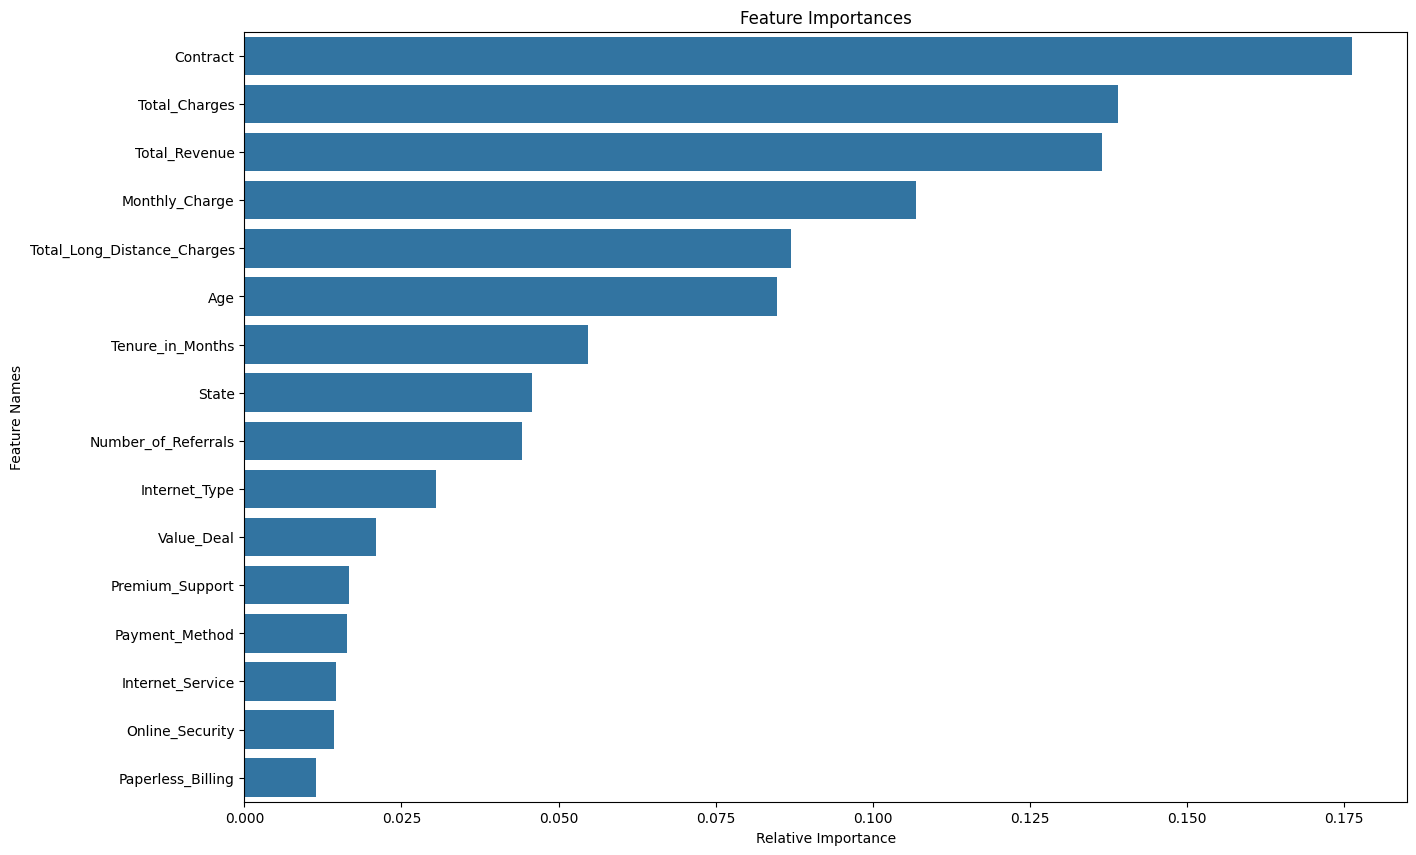

In [307]:
# Plot the feature importances
plt.figure(figsize=(15,10))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [315]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\New folder\Python\New folder\Prediction Data.xlsx"

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame

df_n = pd.read_excel(file_path, sheet_name=sheet_name)

In [316]:
df0=df_n.copy()

In [317]:
customer_ids = df_n['Customer_ID']

In [318]:
df_n = df_n.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Gender', 'Married', 
       'Phone_Service', 'Multiple_Lines','Online_Backup',
       'Device_Protection_Plan','Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
       'Total_Refunds', 'Total_Extra_Data_Charges', 'Customer_Status'
       ], axis=1)

In [319]:
columns_to_encode = [
    'Age', 'State', 'Value_Deal', 'Paperless_Billing',
    'Internet_Service', 'Internet_Type', 'Online_Security',
    'Premium_Support', 'Contract','Payment_Method'
]

In [320]:

label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    df_n[column] = label_encoder[column].fit_transform(df_n[column])

In [321]:
new_predictions = model.predict(df_n)

In [322]:
df0['Customer_Status_Predicted'] = new_predictions

# %%
df0 = df0[df0['Customer_Status_Predicted']==1]

In [324]:
df0.to_csv("Prediction Data tuned")

## 364 Customers Churned
